In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

## Importing the main anime CSV 

In [2]:
anime_data = pd.read_csv("animes_marlesson_jan20.csv")
print("Number of Columns in Original Data: " + str(len(anime_data.columns)))
print("Number of Observations in Original Data: " + str(len(anime_data)))
anime_data.head()

Number of Columns in Original Data: 12
Number of Observations in Original Data: 19311


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


## Cleaning the Data by Deleting and Renaming Columns

In [3]:
anime_data = anime_data.drop(columns = ['img_url', 'link'])
anime_data = anime_data.rename(columns = {'score':'rating'}) 
print("Number of Columns After Cleaning Data: " + str(len(anime_data.columns)))
print("Number of Observations After Cleaning Data: " + str(len(anime_data)))
anime_data.head()

Number of Columns After Cleaning Data: 10
Number of Observations After Cleaning Data: 19311


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,rating
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


## Analysis of Number of Anime Aired Per Year

In this section, we hope to analyze the number of anime that is aired per year. 

The dataset does not contain a column with only the year, so we first extracted the initial airing year from each observation in the column "aired":

In [4]:
# Function that converts aired to first aired year 
def extract_year(dataframe):
    aired_years = []
    for dates in dataframe['aired']:
        start = dates.index(",") + 2 
        year = dates[start:start+4] #gets the first year  
        aired_years.append(year)

We then appended a new column onto the anime_data dataset that contains just the year in which the anime was originally aired: 

In [5]:
# Adding a new column to represent the aired year 
# Cases: month, year ; Not available ; just 1 year ; 20xx to 20xx 
aired_years = [] 
for dates in anime_data['aired']: 
    if dates == "Not available":
        aired_years.append("NaN")
    elif len(dates) > 4 and dates[0].isalpha():
        start = dates.index(",") + 2 
        year = dates[start:start+4] #gets the first year  
        aired_years.append(int(year))
    else:
        aired_years.append(dates[0:3])
anime_data['aired_year'] = aired_years

In [6]:
anime_copied = anime_data.copy()
print("Below are the first 5 rows of the dataset with the new column 'aired_year' ")
anime_copied.head()

Below are the first 5 rows of the dataset with the new column 'aired_year' 


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,rating,aired_year
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,2015
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,2014
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,2017
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,2009
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,2017


A future direction would be to look at how many anime is aired per year by using a histogram. 

In [7]:
#WILL HAVE IMPLEMENTATION IN THE FUTURE

## Analysis of Correlation Between Popularity and Ranking

Popularity refers to how many users on MyAnimeList have that specific anime added into any list (ex: "want to watch", "watching", "dropped", "finished", etc.) under their account. Given that people often base their watching decisions off of word-of-mouth or online recommendations, higher exposure to an anime name might be what leads people to put the anime down on their list, thus indicating high popularity. In addition, the titles that get passed around tend to be titles that were well-received. Consequently, we predict that higher popularity should be somewhat positively correlated with the anime's ranking, such that a low digit in popularity corresponds with a low digit in ranking. This next section will attempt to analyze this relationship:

Scatterplot of Popularity and Rank:

Text(0.5, 1.0, 'Anime Popularity v. Rank')

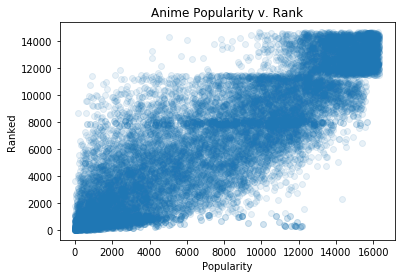

In [8]:
plt.scatter(anime_data['popularity'], anime_data['ranked'], alpha = 0.1)
plt.xlabel("Popularity") and plt.ylabel("Ranked") and plt.title("Anime Popularity v. Rank")

In [9]:
pop_rank_correlation = anime_data['popularity'].corr(anime_data['ranked'])
print("Correlation between Anime Popularity and Rank: {:.2f}".format(pop_rank_correlation))

Correlation between Anime Popularity and Rank: 0.85


## Analysis of The Number of Anime That Each Genre Has 

Many anime in the dataset are tagged with more than one genre. Below, we hoped to analyze which genres are most common in anime. 

In [10]:
anime_data_copy = anime_data.copy()
tags = anime_data_copy['genre'][0] 
tags = ast.literal_eval(tags)

First, we found all the unique anime genres below: 

In [11]:
genre_list = []
for anime_tags in anime_data_copy['genre']: 
    anime_tags = ast.literal_eval(anime_tags)
    for i in range(len(anime_tags)):
        if anime_tags[i] not in genre_list:
            genre_list.append(anime_tags[i])
print("List of anime genres: " + str(genre_list))

List of anime genres: ['Comedy', 'Sports', 'Drama', 'School', 'Shounen', 'Music', 'Romance', 'Sci-Fi', 'Adventure', 'Mystery', 'Fantasy', 'Action', 'Military', 'Magic', 'Supernatural', 'Vampire', 'Slice of Life', 'Demons', 'Historical', 'Super Power', 'Mecha', 'Parody', 'Samurai', 'Seinen', 'Police', 'Psychological', 'Josei', 'Space', 'Kids', 'Shoujo Ai', 'Ecchi', 'Shoujo', 'Horror', 'Shounen Ai', 'Cars', 'Martial Arts', 'Game', 'Thriller', 'Dementia', 'Harem', 'Hentai', 'Yaoi', 'Yuri']


### Creating Genre Counting Dataframe

Next, we created a dataframe with the genre and count columns. We instantiated the counts to 0 for each genre. 

In [12]:
genre_count = pd.DataFrame(columns = ['genre', 'count'])
genre_count['genre'] = genre_list
genre_count['count'] = [0] * len(genre_list)
genre_count.head()

,genre,count
0,Comedy,0
1,Sports,0
2,Drama,0
3,School,0
4,Shounen,0


In [13]:
for anime_tags in anime_data_copy['genre']: 
    anime_tags = ast.literal_eval(anime_tags)
    for genre in anime_tags:
        i = genre_list.index(genre)
        genre_count['count'][i] = genre_count['count'][i] + 1 
print("First few rows of new dataframe: ")
print(genre_count.head())

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


First few rows of new dataframe: 
     genre  count
0   Comedy   6461
1   Sports    811
2    Drama   3004
3   School   1912
4  Shounen   2322


### Sorting Genre Counts from Most Counts to Least Counts

In [14]:
genre_count.sort_values(by = ['count'], ascending = False)

,genre,count
0,Comedy,6461
11,Action,4215
10,Fantasy,3466
8,Adventure,3143
2,Drama,3004
7,Sci-Fi,2832
40,Hentai,2574
28,Kids,2549
4,Shounen,2322
6,Romance,2152


## Merging User Profiles CSV with User Reviews CSV

In [15]:
users = pd.read_csv("profiles.csv")
users.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


After importing the file, we cleaned the data of columns that we don't need: 

In [16]:
users = users.drop(columns = ['birthday', 'link'])

Then, we imported the reviews.csv: 

In [17]:
reviews = pd.read_csv("reviews.csv")
reviews.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


Finally, we got to merging the user reviews with the user profile: 

In [18]:
user_reviews = pd.merge(users, reviews, on = "profile")
user_reviews.head()

,profile,gender,favorites_anime,uid,anime_uid,text,score,scores,link
0,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",255938,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",255793,12403,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '9...",https://myanimelist.net/reviews.php?id=255793
2,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",298207,35073,\n \n \n \n ...,6,"{'Overall': '6', 'Story': '6', 'Animation': '8...",https://myanimelist.net/reviews.php?id=298207
3,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",255795,23225,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '8', 'Animation': '9...",https://myanimelist.net/reviews.php?id=255795
4,DesolatePsyche,Male,"['33352', '25013', '5530', '33674', '1482', '2...",291256,2035,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '9', 'Animation': '7...",https://myanimelist.net/reviews.php?id=291256


Next, we looked at how many animes received reviews: 

In [19]:
print("Number of Animes that Received Reviews: " + str(len(user_reviews['anime_uid'].unique())))

Number of Animes that Received Reviews: 8113
